<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S10_C1_C_means_Fuzzy%2Bkmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo tomado de: [scikit-fuzzy](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html)

In [68]:
!pip install scikit-fuzzy

In [69]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [70]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers

In [71]:
centers = [[1,5],
           [3,5],
           [1,2],
           [5,8],
           [3,1]
           ]

# Define three cluster sigmas in x and y, respectively

In [72]:
sigmas = [[0.1, 0.9],
          [0.9, 0.1],
          [0.5, 0.5],
          [0.5, 0.5],
          [0.7, 1.1]]

In [73]:
# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

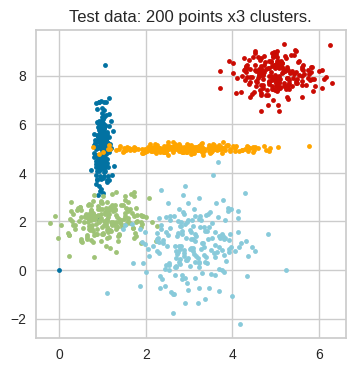

In [82]:
# Visualize the test data
fig0, ax0 = plt.subplots(figsize=(4, 4))
for label in range(5):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

# Fuzzy c-means clustering

Los principios de la lógica difusa se pueden utilizar para agrupar datos multidimensionales, asignando a cada punto una membresía en cada centro del grupo del 0 al 100 por ciento. Esto puede ser muy poderoso en comparación con la agrupación tradicional con umbrales estrictos, donde a cada punto se le asigna una etiqueta exacta y nítida.

La agrupación difusa de c-means se logra a través de skfuzzy.cmeans, y la salida de esta función se puede reutilizar para clasificar datos nuevos de acuerdo con los grupos calculados (también conocidos como predicción) a través de skfuzzy.cmeans_predict

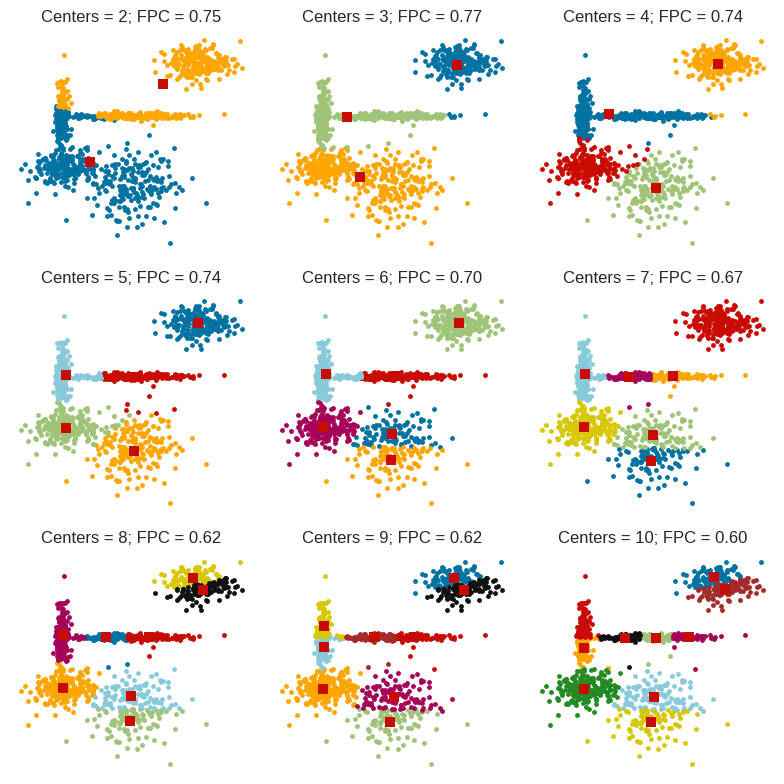

In [75]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):

    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)


    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)

    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

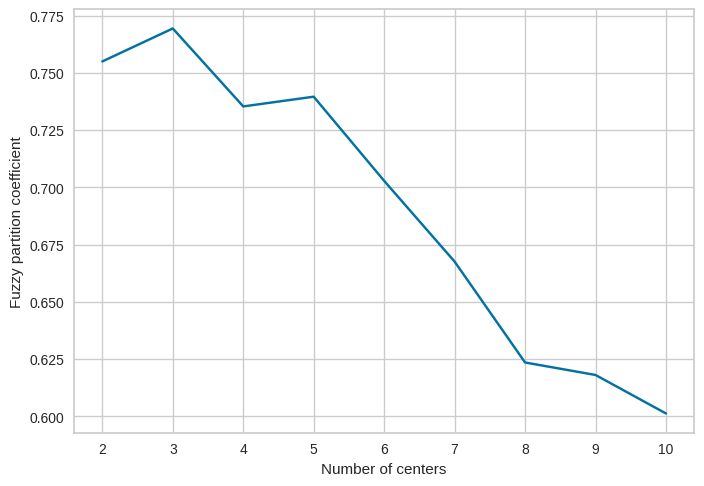

In [76]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

# Kmeans tradicional

In [77]:
import pandas as pd

data = pd.DataFrame({'x': xpts, 'y': ypts})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1001 non-null   float64
 1   y       1001 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


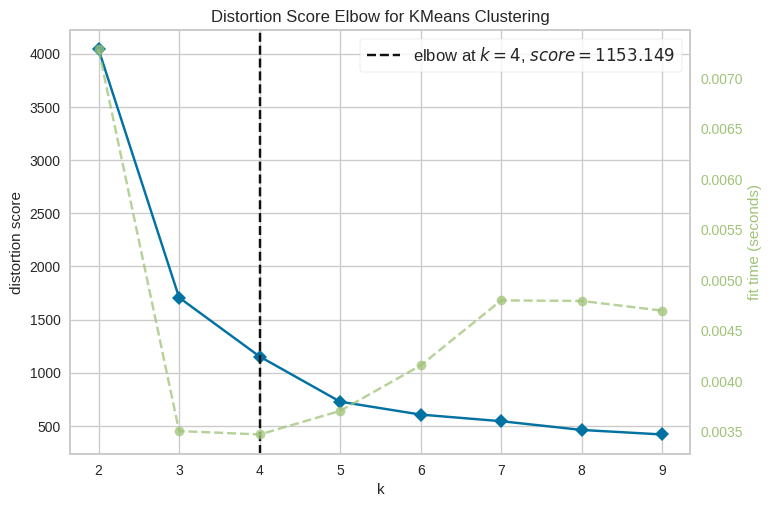

In [78]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(data)
visualizer.show()
plt.show()

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1001 non-null   float64
 1   y       1001 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


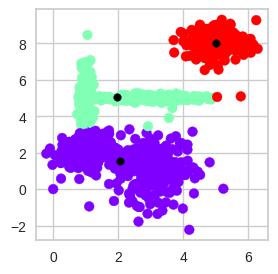

In [92]:
modelo_4k = KMeans(n_clusters=3, random_state=1).fit(data)
plt.figure(figsize=(3,3))
plt.scatter(x = data['x'], y= data['y'], c= modelo_4k.labels_, cmap='rainbow')

modelo_4k.cluster_centers_
plt.scatter(x = modelo_4k.cluster_centers_[:,0], y = modelo_4k.cluster_centers_[:,1], s=30, c='black')


In [81]:
data[x]

NameError: name 'x' is not defined